<a href="https://colab.research.google.com/github/icaroo-oliveira/Usando-CNN-para-classificar-faces-de-acordo-com-o-sexo-biol-gico/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 92% 104M/113M [00:01<00:00, 108MB/s] 
100% 113M/113M [00:01<00:00, 94.1MB/s]


In [84]:
pip install numpy pandas seaborn matplotlib opencv-python imbalanced-learn scikit-learn


In [71]:
print(files_in_photos)
print(len(files_in_photos))

['f-020-01.jpg', 'f-016-01.jpg', 'm1-021-01.jpg', 'm-021-01.jpg', 'm-009-01.jpg', 'm-045-01.jpg', 'm-074-01.jpg', 'm-076-01.jpg', 'f1-011-01.jpg', 'm1-022-01.jpg', 'f1-009-01.jpg', 'f-017-01.jpg', 'm-055-01.jpg', 'm-031-01.jpg', 'm-093-01.jpg', 'm-037-01.jpg', 'f-007-01.jpg', 'm-094-01.jpg', 'm1-011-01.jpg', 'f1-013-01.jpg', 'm-044-01.jpg', 'f-015-01.jpg', 'm-081-01.jpg', 'f-022-01.jpg', 'm-090-01.jpg', 'm1-014-01.jpg', 'f-032-01.jpg', 'm-030-01.jpg', 'm1-002-01.jpg', 'm-026-01.jpg', 'f1-014-01.jpg', 'f-012-01.jpg', 'f-010-01.jpg', 'm-028-01.jpg', 'm-010-01.jpg', 'f1-008-01.jpg', 'm-100-01.jpg', 'm-099-01.jpg', 'f-034-01.jpg', 'm1-007-01.jpg', 'm-068-01.jpg', 'm-018-01.jpg', 'm1-005-01.jpg', 'm1-027-01.jpg', 'm1-018-01.jpg', 'm1-033-01.jpg', 'm-082-01.jpg', 'm-096-01.jpg', 'm1-031-01.jpg', 'm-058-01.jpg', 'f-027-01.jpg', 'm1-006-01.jpg', 'm-095-01.jpg', 'f-026-01.jpg', 'f-037-01.jpg', 'm-069-01.jpg', 'm-091-01.jpg', 'm-036-01.jpg', 'm-089-01.jpg', 'm1-034-01.jpg', 'f-011-01.jpg', 'm1-0

In [72]:
import cv2
import numpy as np

def preprocess_images(image_paths):

    images = []
    labels = []

    for image_path in image_paths:
        #imagem em RGB
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        if image is None:
            print(f"Erro ao carregar a imagem: {image_path}")
            continue

        #250x200 (altura x largura)
        image_resized = cv2.resize(image, (200, 250))

        #normalização [0,1]
        image_normalized = image_resized / 255.0

        #adiciona a lista
        images.append(image_normalized)

    label = [0 if file.startswith(('m', 'm1')) else 1 for file in files_in_photos]
    labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels


In [73]:
import os

#caminho para a pasta das imagens
image_folder = "photos"
image_paths = [os.path.join(image_folder, file) for file in os.listdir(image_folder) if file.endswith(('.jpg', '.png'))]

#pré-processa as imagens
images, labels = preprocess_images(image_paths)

print(f"Número de imagens: {len(images)}")
print(f"Número de rótulos: {len(labels[0])}")
print(f"Formato de uma imagem: {images[0].shape}")
print(f"rótulo: {labels[0]}")


Número de imagens: 188
Número de rótulos: 188
Formato de uma imagem: (250, 200, 3)
rótulo: [1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 1]


In [74]:
from collections import Counter

#visualizando como está a quantidade de faces (masculino x feminino)
label_counts = Counter(labels[0])

print(label_counts)  #exemplos por label


most_common_label = label_counts.most_common(1)  #mais exemplos
least_common_label = label_counts.most_common()[-1]  #menos exemplos

print(f"Label com mais exemplos: {most_common_label}")
print(f"Label com menos exemplos: {least_common_label}")

Counter({0: 134, 1: 54})
Label com mais exemplos: [(0, 134)]
Label com menos exemplos: (1, 54)


In [75]:
from imblearn.over_sampling import SMOTE

#achatar as imagens para 2D
images_reshaped = images.reshape(images.shape[0], -1)

#inicializar o SMOTE
smote = SMOTE(sampling_strategy='auto')

#over-sampling
X_res, y_res = smote.fit_resample(images_reshaped, labels[0])

#voltando para o formato original
X_res_reshaped = X_res.reshape(X_res.shape[0], images.shape[1], images.shape[2], images.shape[3])


In [76]:
from sklearn.model_selection import train_test_split

def split_data(images, labels, train_ratio=0.5, val_ratio=0.3, test_ratio=0.2):
    if train_ratio + val_ratio + test_ratio != 1.0:
        raise ValueError("proporções de divisao devem somar 1.0")

    #dividir em treinamento e uma parte temporária
    train_images, temp_images, train_labels, temp_labels = train_test_split(
        images, labels, test_size=(val_ratio + test_ratio), random_state=23
    )

    #usar a parte temporária para validação e teste
    val_images, test_images, val_labels, test_labels = train_test_split(
        temp_images, temp_labels, test_size=test_ratio / (val_ratio + test_ratio), random_state=23
    )

    return train_images, train_labels, val_images, val_labels, test_images, test_labels


In [77]:
train_images, train_labels, val_images, val_labels, test_images, test_labels = split_data(X_res_reshaped, y_res)  #dividindo em treinamento, teste e validacao

In [78]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(val_images.shape, val_labels.shape)


(134, 250, 200, 3) (134,)
(54, 250, 200, 3) (54,)
(80, 250, 200, 3) (80,)


In [79]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

#parâmetros do modelo
IMG_HEIGHT = 250  #altura das imagens
IMG_WIDTH = 200   #largura das imagens
DIMENSION = 3     #imagens em rgb
NUM_CLASSES = 1   #única saída 0 ou 1


model = models.Sequential()

#primeira camada convolucional + maxPooling
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same',
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, DIMENSION), activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

#segunda camada convolucional + maxPooling
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

#terceira camada convolucional + maxPooling
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))

#dropout e flatten
model.add(Dropout(rate=0.5))
model.add(Flatten())

#camada totalmente conectada (densa) com saída binária
model.add(Dense(256, activation='relu'))  #intermediária
model.add(Dropout(rate=0.5))  #dropout
model.add(Dense(NUM_CLASSES, activation='sigmoid', name='preds'))  #saída para classificação binária

#compilando o modelo c adam
optimizer = Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  #usado em classificação binária
              metrics=['accuracy'])

#modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 250, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 125, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 125, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 63, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 63, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 32, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      26,214,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ preds (Dense)                        │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,308,161 (100.36 MB)

 Trainable params: 26,308,161 (100.36 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from keras.callbacks import Callback

#callback personalizado para calcular métricas de validação
class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        val_images, val_labels = self.validation_data


        val_predictions = self.model.predict(val_images, verbose=0)
        val_predictions_binary = (val_predictions > 0.5).astype(int)  #pra classificação binária

        #calculando f1 geral e aucroc
        f1 = f1_score(val_labels, val_predictions_binary, average='binary')
        auc = roc_auc_score(val_labels, val_predictions)


        print(f'\n[F1-Score: {f1:.4f}] [AUC-ROC: {auc:.4f}]')


#adcionando o callback de métricas
metrics_callback = MetricsCallback(validation_data=(val_images, val_labels))

#treinando
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),  #avaliando no treinamento
    batch_size=16,
    epochs=15,
    verbose=1,
    callbacks=[metrics_callback]  #callback
)


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5523 - loss: 1.3876
[F1-Score: 0.6441] [AUC-ROC: 0.9160]
9/9 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.5516 - loss: 1.3635 - val_accuracy: 0.4750 - val_loss: 0.6821
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5786 - loss: 0.6673
[F1-Score: 0.7761] [AUC-ROC: 0.9317]
9/9 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.5834 - loss: 0.6658 - val_accuracy: 0.8125 - val_loss: 0.5216
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8305 - loss: 0.4503
[F1-Score: 0.8451] [AUC-ROC: 0.9417]
9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.8310 - loss: 0.4454 - val_accuracy: 0.8625 - val_loss: 0.3489
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8687 - loss: 0.2706
[F1-Score: 0.8718] [AUC-ROC: 0.9361]
9/9 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.8684 - loss: 0.2755 - val_accuracy: 0.8750 - val_loss: 0.4184
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8769 - loss: 0.

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 765ms/step - accuracy: 0.9525 - loss: 0.3324
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step
Acurácia no conjunto de teste: 94.44%
Relatório de classificação (F1-Score):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.96      0.92      0.94        25

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.94      0.94      0.94        54

AUC-ROC = 0.94


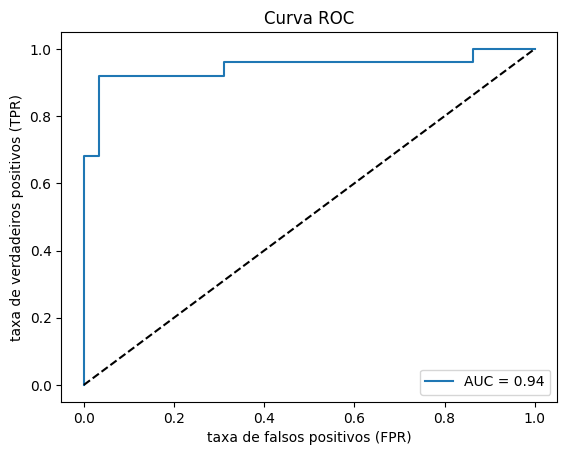

In [81]:
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

#avaliando o modelo e   previsões
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
pred_probs = model.predict(test_images)


pred_classes = (pred_probs > 0.5).astype(int)  #classes preditas
true_classes = test_labels  #classes verdadeira


print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")

#F1-Score
report = classification_report(true_classes, pred_classes, target_names=['0', '1'])
print("Relatório de classificação (F1-Score):")
print(report)

#roc e auc-roc
fpr, tpr, _ = roc_curve(true_classes, pred_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC = {roc_auc:.2f}")

#plotando curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('taxa de falsos positivos (FPR)')
plt.ylabel('taxa de verdadeiros positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


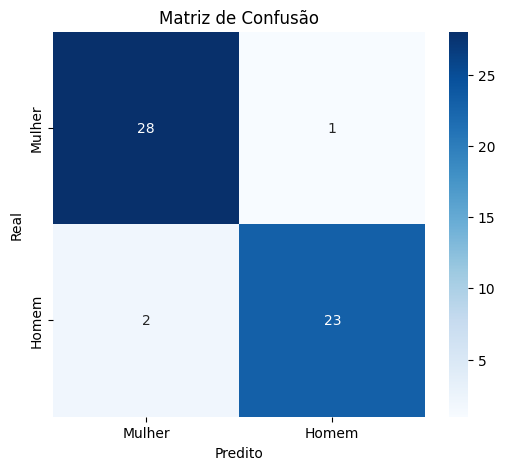

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


cm = confusion_matrix(true_classes, pred_classes)

#plotar a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Mulher', 'Homem'], yticklabels=['Mulher', 'Homem'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Forma das previsões: (54,)
Forma das classes reais: (54,)
Existem 3 exemplos errados.


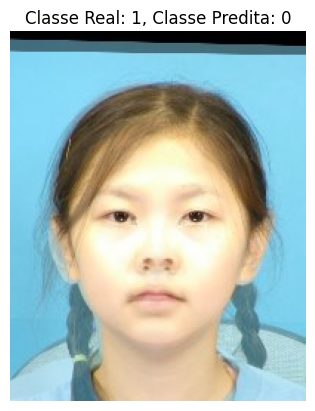

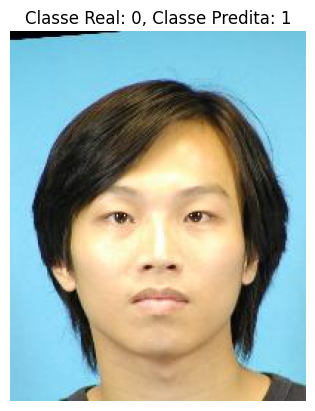

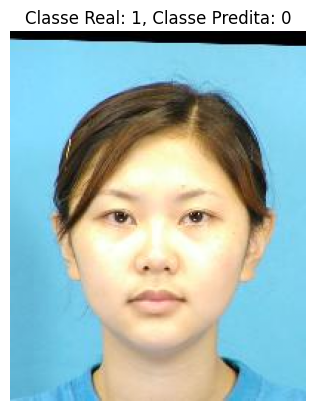

In [83]:
#ANALISANDO QUAIS IMAGENS FORAM CLASSIFICADOS ERRONEAMENTE

pred_classes = pred_classes.flatten()
true_classes = true_classes.flatten()


print(f"Forma das previsões: {pred_classes.shape}")
print(f"Forma das classes reais: {true_classes.shape}")

#previsões erradas
incorrect_indices = np.where(pred_classes != true_classes)[0]  # Extrair os índices da tupla


print(f"Existem {len(incorrect_indices)} exemplos errados.")

#imagens classificadas erroneamente
for i in incorrect_indices:
    image = test_images[i]

    image = image[..., ::-1]

    plt.imshow(image)
    plt.title(f"Classe Real: {test_labels[i]}, Classe Predita: {pred_classes[i]}")
    plt.axis('off')
    plt.show()